Links for 1000 most common words (last accessed 14-MAY-2024):

english: https://www.ef.edu/english-resources/english-vocabulary/top-1000-words/    (last accessed 14-MAY-2024)

spanish: https://strommeninc.com/1000-most-common-spanish-words-frequency-vocabulary/   (last accessed 14-MAY-2024)

russian: http://masterrussian.com/vocabulary/most_common_words.htm  (last accessed 15-MAY-2024)

arabic: https://1000mostcommonwords.com/1000-most-common-arabic-words/ (last accessed 17-MAY-2024)

In [1]:
# Imports
from methods import *
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import os
import string
import pylab as plot
from matplotlib_venn import venn3
import numpy as np
import pandas as pd

# Initialize paths
languagesDir = r'data\languages'
sampleDir = r'data\samplesDocs'


In [2]:
# Reads the data of the 1000 most common words in the given languages from the data/languages folder
# Here the language is KNOWN
langDict = readData(languagesDir)

# Tokenizes every word based on the language
stemDict  = stem(langDict)

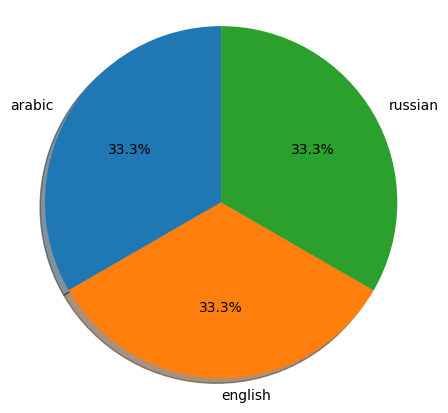

In [3]:
# Displays the samples for each different language as a percentage of a pie chart
fig = plt.figure(figsize=(5, 5))

# labels for the keys of our language dict
labels = langDict.keys()

# Sizes of slice
sizes =  []
for i in list(langDict.values()):
    sizes.append(len(i))

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.show()

It is important to note that english and spanish share some very similar word structures. Specifically, words like 'a' apply to both languages but mean different things. This could create and unwanted bias as 'a' may appear more frequently in english than spanish, and so it is not evaluated equivalently.

For now, we will ignore this bias

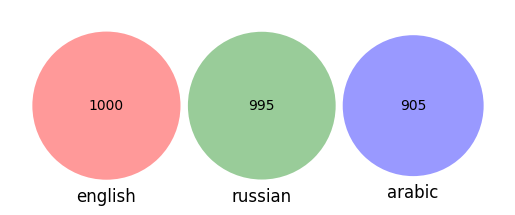

In [4]:
'''
Quick Diagram to show that spanish and english do indeed overlap, while russian does not overlap
with the others. This is expected as Russian uses an entirely different alphabet.
It is also noteworthy that while converting our list of words to sets, we seem to lose some of the words
from Russian and especially Spanish. The original datasets will need to be updated and expanded when we
actually go to train a model.
'''

set1 = set(langDict.get('english'))
set2 = set(langDict.get('russian'))
set3 = set(langDict.get('arabic'))

venn3([set1, set2, set3], ('english', 'russian', 'arabic'))

plt.show()

In [5]:
# Create a new dictionary
langScores = {}

# for every document we have in a given directory, get the vectorized language scores of the document
# and add it to the dictionary as a value with the respective key being the name of the file
# Here the language is NOT KNOWN
for file in os.listdir(sampleDir):
    filePath = sampleDir + '/' + file

    content = readRawText(filePath)+'\n'
    freqs = freqsCalculator(content, stemDict)
    languageScore = langScore(content, freqs)
    langScores[file] = np.array(list(languageScore.values()))

# Build the matrix and get the labels of the respective points (in this case, the labels are just the file names)
matrix, labels = matrixBuilder(langScores)

# Project the matrix onto 2D and 3D space 
proj_matrix_3D = project_to_3d(matrix)
proj_matrix_2D = project_to_2d(matrix)

# Plot the projections
plot_3d_projection(proj_matrix_3D,labels)
plot_2d_projection(proj_matrix_3D,labels)

In [19]:
# need to manually label (some of) the dataset and train a KNN model on it. Should use euclidean distance
# but may benefit from looking at cosine similarity as well.

df = pd.DataFrame(langScores).transpose().rename(columns={0: 'arabic', 1: 'eng', 2: 'rus'})

# Find the column name with the max value for each document
max_columns = df.idxmax(axis=1)

result = df.apply(max_column_or_label, axis=1)
print(pd.concat([df,result], axis = 1))

df = pd.concat([df,result], axis = 1)
df

                                                      arabic       eng  rus  \
3 landasan utama dienul Islam.txt                   0.000000  0.215487  0.0   
33 SIKAP GHULUW DALAM TAK.txt                       0.000054  0.244632  0.0   
4 kaidah mengetahui kesyirikan _ syaikh muhamma...  0.001167  0.203746  0.0   
44 Ways To Support Jihad.txt                        0.000000  0.374434  0.0   
5_106434014058905971.txt                            0.000000  0.254559  0.0   
...                                                      ...       ...  ...   
_____ ________ ___ ____ _____ _______ ____ ___.txt  0.032096  0.000102  0.0   
_______ __ ___ _____ _______.txt                    0.000000  0.000000  0.0   
_______ ___ ____ _______.txt                        0.236528  0.000005  0.0   
_______ _____.txt                                   0.000000  0.000000  0.0   
الارض مسطحة 3.txt                                   0.000000  0.000000  0.0   

                                                   

,arabic,eng,rus,0
3 landasan utama dienul Islam.txt,0.000000,0.215487,0.0,eng
33 SIKAP GHULUW DALAM TAK.txt,0.000054,0.244632,0.0,eng
4 kaidah mengetahui kesyirikan _ syaikh muhammad bin abdul wahhab.txt,0.001167,0.203746,0.0,eng
44 Ways To Support Jihad.txt,0.000000,0.374434,0.0,eng
5_106434014058905971.txt,0.000000,0.254559,0.0,eng
...,...,...,...,...
_____ ________ ___ ____ _____ _______ ____ ___.txt,0.032096,0.000102,0.0,arabic
_______ __ ___ _____ _______.txt,0.000000,0.000000,0.0,Not Enough Data
_______ ___ ____ _______.txt,0.236528,0.000005,0.0,arabic
_______ _____.txt,0.000000,0.000000,0.0,Not Enough Data
